# Grades of Students - Project

Problem Statement:
    
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description    --  total 43 columns

Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam


Predict   CGPA of a student based on different grades in four years.

In [98]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [99]:
# Importing the dataset

grades = pd.read_csv('Grades.csv')
grades

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-,B+,D,A-,B-,C+,D+,D+,D,A,D,C-,C,C-,C+,B,C,C+,B+,C,C-,C,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,D,B+,C+,B-,C-,D+,D+,D,C,D,B-,C,D,D+,D,C-,A-,D+,C-,C-,C,A-,D,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,B-,A-,A,A,A,A,A+,A,A-,A,A-,A,A,C+,A,B+,A-,B,A,B+,A-,A-,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,D,B,D+,B-,D,C,B+,C+,D,D+,D,D,D+,D,B-,D,B-,D+,C-,D+,B+,C-,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,C,A,A,A-,A-,A-,B-,A,A-,A,A-,A-,C+,C-,A-,B-,A-,C+,A-,A-,B-,A-,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,B+,A+,A,A+,A,A,A,A,A+,A,A,B,A-,A,B,A-,A-,A,A+,A+,A,A,B+,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,A,A+,B+,C+,A-,B,A,A,A+,A+,A,A,B,A,A,A,A,A,A,A+,A,A+,A-,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,B,A+,B-,B,B+,B,A-,A,B+,B,A,B+,B,A,B,B-,B+,B+,A,B+,B,C+,B+,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,C-,A+,C+,D,D,B,B-,B,B-,C,B-,D+,D+,C+,D,C,C,C+,C-,C-,D,B-,B+,D,B,B,C-,D,C,B,B-,C,2.193


# Exploratory Data Analysis(EDA)

# Data Pre - Processing

In [100]:
# Checking the sample of the dataset

pd.set_option('display.max_columns',None)
grades.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
431,CS-97432,C,C,A,A-,B-,B+,C+,C,B,B-,D,B,D,B,C+,B+,C+,B-,D+,B,B,C,A,B,C+,B+,B+,B+,B,B-,C-,C,A-,B,A,C,B,C+,A-,B+,B,2.784
448,CS-97449,A-,C,A,A,A-,A,B+,B-,B+,B,B,B+,B-,B+,A-,A,A,A-,B-,A-,A-,B+,A+,B+,B,B+,A-,A-,A-,B+,B,A,B+,B,A,B+,A-,A-,A,A,A-,3.523
321,CS-97322,B-,B+,B+,C,A-,B,A-,A+,A-,B+,A-,A,B,B-,A-,A-,A,B-,B,A,A,B,A-,B,C+,B+,B+,A-,B+,A-,C,B+,A+,B,B+,B-,NaN,A-,B,A-,B+,3.330
369,CS-97370,D+,A-,B,B+,C,C-,B+,C+,C,D+,D+,B,A+,D,B,B-,C,C+,C,C+,B-,D,A-,B-,C,B-,C,A-,C,D+,C+,B,A,C,B-,C,NaN,B,B,A-,B-,2.512
147,CS-97148,A-,A-,A-,C-,C+,A,B+,B+,A-,D,A-,A-,A-,B,C-,B-,D+,C,C-,B-,D+,C,D+,C,C+,C-,B,B-,B+,B-,B+,A-,C-,C-,D+,D+,A-,A-,C,C,B+,2.603
249,CS-97250,A-,A-,A-,B-,B-,B+,B,B-,C,D,A,B+,C+,A-,D+,B,C,C-,C-,B-,C,C+,A-,C,A-,B-,B+,B+,C,C+,B-,B+,C,B-,B,C-,A-,B,B-,B+,A-,2.785
528,CS-97529,A,B+,A,A,A-,A,A,A,A,A,A,C+,A,A-,A-,A,A,A,B,B+,A-,A,A,B+,B+,A,A,B+,A,A,B+,B,A,B+,A,A,A,B,A-,B,A-,3.734
43,CS-97044,C-,B+,C,B+,C+,A-,B+,B-,A,A,C+,A-,D,B+,D,A-,C-,B+,C+,D+,B,B-,B+,B-,A-,B-,A-,C+,A-,B,B+,A-,B+,B+,B-,C+,A,A-,B-,B,A,3.058
408,CS-97409,D,C,D,D+,C+,B-,B,D+,D+,B,D+,C,A-,C+,C+,C,D+,D+,D+,B-,B+,C-,B+,B-,D+,A,C,A-,C+,C-,C-,C-,A,C,C,B-,B,B+,C+,A-,NaN,2.343
8,CS-97009,A-,C,A-,D+,B,A-,A-,A-,B+,A-,A-,A,A,A-,B-,A-,A-,A,B-,A+,C+,C+,A-,C-,B+,B,B,B+,A,A-,B+,A-,B+,B,B-,C+,A,A-,B+,A-,A,3.358


In [101]:
# Checking the shape of the dataset

grades.shape

(571, 43)

In [102]:
# Checking the information of the dataset

grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [103]:
# Checking null values

grades.isnull().sum().sort_values(ascending=False)

CS-406       85
CS-412       79
CS-423       14
CS-414       13
CS-419       13
CS-317       12
CS-421       12
CS-403       12
TC-383       10
EF-303       10
HS-304       10
CS-301       10
CS-302       10
CS-312       10
MT-442       10
MT-331        9
EL-332        9
CS-318        9
CS-306        9
EE-222        7
MT-224        7
CS-210        7
CS-212        6
CS-215        6
EE-217        6
CS-214        6
CS-203        5
CS-211        5
MT-222        5
HS-205/20     5
CS-107        2
ME-107        2
EE-119        2
EL-102        2
CS-106        2
MT-111        2
HS-105/12     1
CY-105        1
Seat No.      0
PH-121        0
CS-105        0
HS-101        0
CGPA          0
dtype: int64

In [104]:
# Checking missing values ratio

grades_null = grades.isnull().sum()/len(grades)*100
grades_null = grades_null.drop(grades_null[grades_null==0].index).sort_values(ascending=False)
grades_null

CS-406       14.886165
CS-412       13.835377
CS-423        2.451839
CS-419        2.276708
CS-414        2.276708
CS-421        2.101576
CS-403        2.101576
CS-317        2.101576
MT-442        1.751313
CS-301        1.751313
CS-302        1.751313
TC-383        1.751313
CS-312        1.751313
EF-303        1.751313
HS-304        1.751313
EL-332        1.576182
CS-318        1.576182
CS-306        1.576182
MT-331        1.576182
EE-222        1.225919
CS-210        1.225919
MT-224        1.225919
EE-217        1.050788
CS-214        1.050788
CS-212        1.050788
CS-215        1.050788
CS-203        0.875657
CS-211        0.875657
MT-222        0.875657
HS-205/20     0.875657
MT-111        0.350263
CS-107        0.350263
ME-107        0.350263
EE-119        0.350263
EL-102        0.350263
CS-106        0.350263
HS-105/12     0.175131
CY-105        0.175131
dtype: float64

In [105]:
# Checking unique values in the dataset

grades.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [106]:
grades.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [107]:
# Dropping the column Seat No as it will not contribute much to our Model Prediction

grades = grades.drop(['Seat No.'],axis=1)
grades.shape

(571, 42)

Analysis:
    
Dataset contains 571 rows and 43 columns

Datatypes present in the dataset are as follows float64(1), object(42)

We have found null values in the dataset with maximum missing ratio in CS-406 14% and CS-412 13% 

Dropped column Seat No as it will not contribute to our Model Prediction

Model Prediciton algorithm will be Regression

# Data Visualization

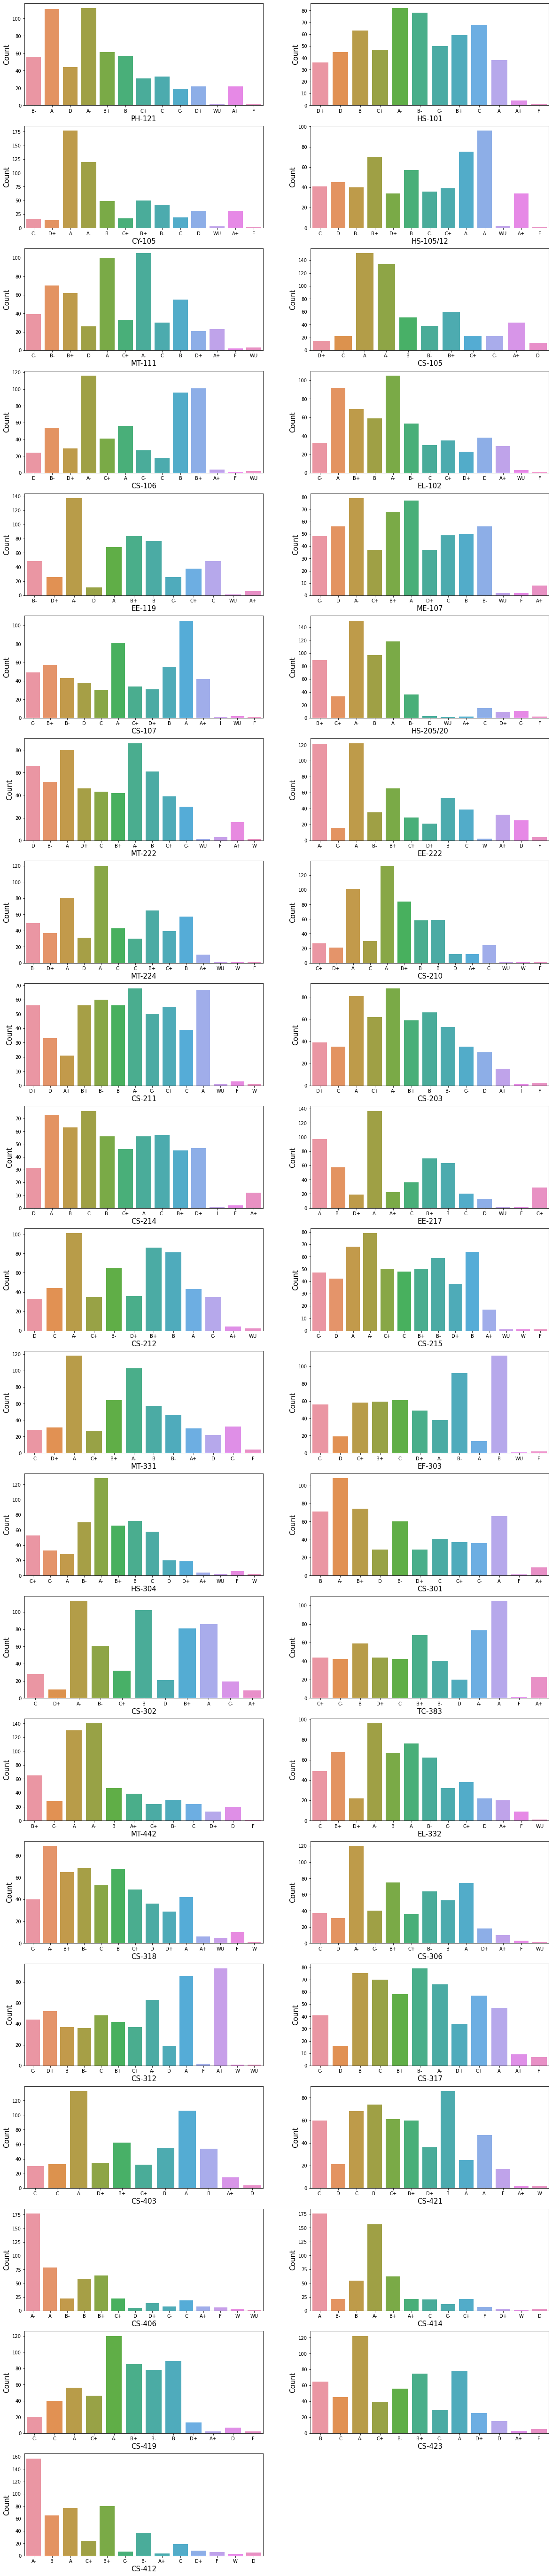

In [108]:
# Visualizing the dataset by countplot

plt.figure(figsize=(20,100))
sub = 1

for i in grades.columns[0:41]:
    if sub <=41:
        st = plt.subplot(21,2,sub)
        sns.countplot(data=grades,x=i)
        plt.xlabel(i,fontsize=15)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.ylabel('Count',fontsize=15)
    sub+=1
plt.show()

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

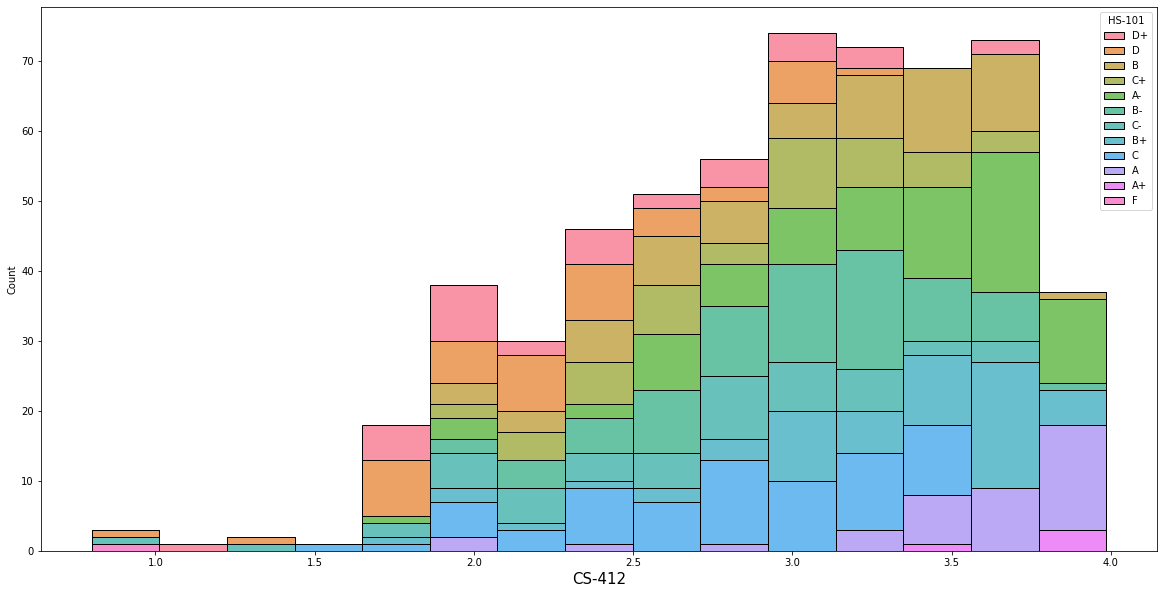

In [109]:
# Visualizing the CGPA scores by histplot

plt.figure(figsize=(20,10))
sns.histplot(data=grades, x="CGPA", hue="HS-101",multiple="stack")
plt.xlabel(i,fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

Analysis:
    
Most of the students CGPA scores are more than 3.0

Apart from EF-303, A and A+ grades are higher across all the courses

# Data Feature Selection and Engineering

In [110]:
# Importing Simple Imputer to replace NaN values

from sklearn.impute import SimpleImputer

for i in grades.columns:
    SI = SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
    grades[i]=SI.fit_transform(grades[i].values.reshape(-1,1))

In [111]:
grades.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [112]:
# Applying Label encoder to categorical columns for analysis 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in grades.columns:
    if(grades[i].dtypes=='object'):
        grades[i]=le.fit_transform(grades[i].values.reshape(-1,1))
grades

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,8,4,9,2,5,7,10,10,9,0,9,8,6,7,7,3,6,7,4,6,8,6,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,4,7,5,8,10,10,9,6,9,5,6,9,10,8,8,2,10,8,8,6,2,9,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,5,2,0,0,0,0,1,0,2,0,2,0,0,6,0,4,2,3,0,4,2,2,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,9,3,10,5,9,6,4,7,9,10,9,9,10,8,5,9,5,10,8,10,4,8,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,6,0,0,2,2,2,5,0,2,0,2,2,7,7,2,5,2,7,2,2,5,2,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3,0,0,2,1,0,2,2,1,4,1,0,1,0,0,0,0,1,0,0,3,2,0,2,2,2,0,1,1,0,0,4,2,2,0,0,0,4,4,3,0,3.798
567,1,0,0,0,0,0,0,2,0,0,1,4,7,2,3,0,0,1,1,0,0,3,0,0,0,0,0,0,1,0,1,2,4,4,0,0,2,3,2,6,2,3.772
568,3,0,2,4,0,0,0,0,0,3,1,5,3,4,3,2,0,4,3,0,4,3,0,2,5,4,4,0,4,3,7,4,2,3,0,4,0,6,4,2,2,3.470
569,0,4,9,0,9,10,5,8,5,8,1,7,9,9,3,5,3,5,6,5,10,10,7,8,6,6,7,8,8,9,5,4,9,3,3,8,9,6,3,5,6,2.193


In [113]:
# Checking the dataset by describe function

grades.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,4.068301,2.975482,4.714536,3.390543,4.241681,3.520140,4.891419,4.409807,5.008757,3.455342,4.549912,4.697023,3.604203,4.371278,4.516637,4.218914,3.534151,4.106830,3.059545,4.129597,4.891419,4.106830,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,3.260701,2.352176,3.300842,2.988254,3.080968,2.735895,3.189695,3.077965,2.996184,2.696200,2.776887,3.087208,3.094009,2.471341,2.659175,2.841928,2.504762,3.190029,2.772033,2.911685,2.960935,2.855123,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,5.000000,3.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,2.000000,4.000000,5.000000,4.000000,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,7.000000,4.000000,8.000000,5.000000,7.000000,5.000000,8.000000,7.000000,7.000000,5.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,5.000000,7.000000,4.000000,6.000000,7.000000,6.000000,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,13.000000,12.000000,13.000000,12.000000,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000,11.000000,13.000000,11.000000,11.000000,13.000000,11.000000,10.000000,11.000000,11.000000,12.000000,13.000000,12.000000,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


Analysis:
    
We can see the huge difference between 75% to max in our dataset but our dataset is 
categorical so we cannot remove outliers

In [118]:
# Checking Correlation

grades.corr()['CGPA'].sort_values()

CS-210      -0.761468
CS-317      -0.760792
CS-214      -0.733848
CS-215      -0.730460
MT-111      -0.730095
EL-332      -0.729609
CS-306      -0.708299
CS-302      -0.696112
MT-224      -0.692696
CS-301      -0.664117
PH-121      -0.663135
ME-107      -0.663023
CY-105      -0.658282
MT-222      -0.656320
EE-217      -0.655993
EE-119      -0.646829
CS-203      -0.644191
CS-212      -0.642878
EL-102      -0.642262
CS-419      -0.641804
CS-421      -0.633001
CS-211      -0.628070
CS-107      -0.615309
HS-105/12   -0.613989
CS-105      -0.613169
MT-442      -0.582592
EE-222      -0.575335
TC-383      -0.572329
CS-318      -0.566393
HS-304      -0.557912
CS-403      -0.544543
HS-101      -0.537170
CS-106      -0.534995
CS-423      -0.520968
MT-331      -0.508428
EF-303      -0.485478
CS-406      -0.474419
CS-412      -0.466512
HS-205/20   -0.460525
CS-312      -0.458019
CS-414      -0.384003
CGPA         1.000000
Name: CGPA, dtype: float64

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

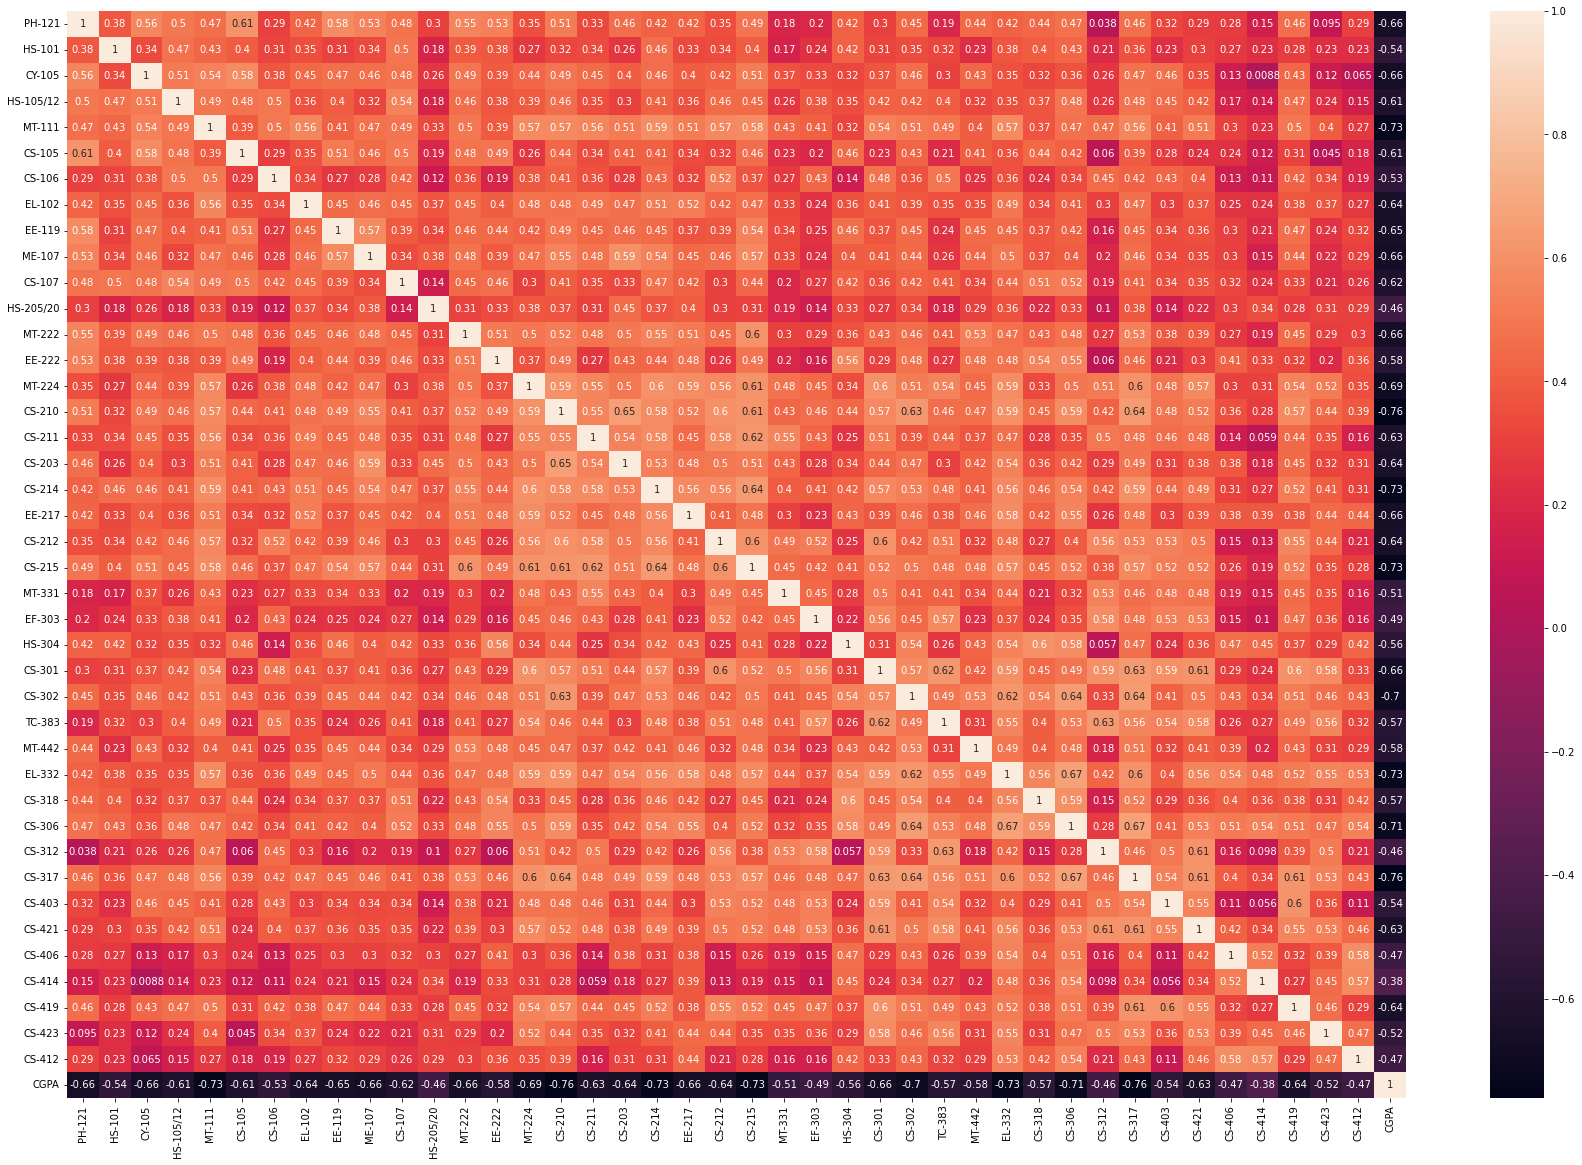

In [123]:
# Visualizing Correlation in heatmap

plt.figure(figsize=(30,20))
sns.heatmap(grades.corr(),annot=True)

In [124]:
# Checking skewness

grades.skew().sort_values()

CGPA        -0.497203
CS-214       0.013129
HS-101       0.053303
ME-107       0.108385
CS-211       0.116085
CS-317       0.140692
CS-215       0.163631
CS-421       0.179508
MT-222       0.193993
CS-203       0.274205
HS-105/12    0.324183
TC-383       0.331652
CS-318       0.356504
EF-303       0.383655
CS-107       0.414846
CS-212       0.414872
CS-301       0.415084
CS-306       0.424753
MT-224       0.430480
CS-312       0.442525
EL-332       0.459160
MT-111       0.484906
EL-102       0.501161
CS-419       0.506748
CS-423       0.526550
HS-304       0.544843
PH-121       0.549104
EE-119       0.574880
CS-302       0.601788
CS-403       0.618339
MT-331       0.627721
CS-106       0.639845
CS-210       0.723967
EE-217       0.724325
EE-222       0.759105
MT-442       0.869952
HS-205/20    0.897186
CS-105       0.930769
CY-105       0.982144
CS-414       1.292931
CS-412       1.329362
CS-406       1.522703
dtype: float64

In [129]:
grades.shape

(571, 42)

Analysis:
    
    
We have not removed outliers or performed transformation method, since our datset is categorical we should not perform
these methods as it will affect the Model prediction.

Let's start creating Model

# Model Evaluation

In [ ]:
x = grades.iloc[:,0:41]
y = grades['CGPA']

In [137]:
x.shape

(571, 41)

In [138]:
y.shape

(571,)

In [139]:
# Importing required Libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression

In [140]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    acc = r2_score(y_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max r2 score is ", maxAcc*100, "on Random state", maxRS)
    

Max r2 score is  95.71338169331608 on Random state 101


# Creating training model

In [141]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=101)

In [142]:
from sklearn.linear_model import Lasso,Ridge

# Regularization with L1 and L2

In [191]:
ls = Lasso(0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9226167089741306

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

LR = LinearRegression()
RFR = RandomForestRegressor()
svr = SVR()
DTR = DecisionTreeRegressor()
GBR = GradientBoostingRegressor()
KNR = KNeighborsRegressor()
BR = BaggingRegressor()
SR = SGDRegressor()
ABR = AdaBoostRegressor()
ETR = AdaBoostRegressor()

Model = [LR,RFR,svr,DTR,GBR,KNR,BR,SR,ABR,ETR]

for m in Model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predmod = m.predict(x_test)
    score = r2_score(y_test,predmod)
    print("R2_score of", m,"is:",score*100)
    print("Mean absolute error: ", mean_absolute_error(y_test,predmod))
    print("Mean squared error: ", mean_squared_error(y_test,predmod))
    print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,predmod)))
    print('*************************************************************')

R2_score of LinearRegression() is: 93.60451147267949
Mean absolute error:  0.11544376478864182
Mean squared error:  0.024411909194043832
Root Mean absolute error:  0.15624310926899732
*************************************************************
R2_score of RandomForestRegressor() is: 96.0013611669789
Mean absolute error:  0.09552499999999985
Mean squared error:  0.015263010429069728
Root Mean absolute error:  0.12354355680920688
*************************************************************
R2_score of SVR() is: 95.49358244272048
Mean absolute error:  0.09641511107491162
Mean squared error:  0.017201227979505563
Root Mean absolute error:  0.13115345203045767
*************************************************************
R2_score of DecisionTreeRegressor() is: 72.13266832128383
Mean absolute error:  0.23035465116279072
Mean squared error:  0.10637104069767443
Root Mean absolute error:  0.3261457353663764
*************************************************************
R2_score of GradientBo

# Cross Validation Score

In [193]:
from sklearn.model_selection import cross_val_score

cr1 = cross_val_score(LR,x,y, cv=10)
cr2 = cross_val_score(RFR,x,y, cv=10)
cr3 = cross_val_score(svr,x,y, cv=10)
cr4 = cross_val_score(DTR,x,y, cv=10)
cr5 = cross_val_score(GBR,x,y, cv=10)
cr6 = cross_val_score(KNR,x,y, cv=10)
cr7 = cross_val_score(BR,x,y, cv=10)
cr8 = cross_val_score(SR,x,y, cv=10)
cr9 = cross_val_score(ABR,x,y, cv=10)
cr10 = cross_val_score(ETR,x,y, cv=10)

print('CV score of Linear Regression:',cr1.mean()*100)
print('CV score of Random Forest Regressor:',cr2.mean()*100)
print('CV score of Support Vector Regressor:',cr3.mean()*100)
print('CV score of Decision Tree Regressor:',cr4.mean()*100)
print('CV score of Gradient Boost Regressor:',cr5.mean()*100)
print('CV score of K Neighbors Regressor:',cr6.mean()*100)
print('CV score of Bagging Regressor:',cr7.mean()*100)
print('CV score of SGDRegressor:',cr8.mean()*100)
print('CV score of AdaBoostRegressor:',cr9.mean()*100)
print('CV score of ExtraTrees Regressor:',cr10.mean()*100)

CV score of Linear Regression: 90.83070308162753
CV score of Random Forest Regressor: 91.09504240533617
CV score of Support Vector Regressor: 91.56204944681947
CV score of Decision Tree Regressor: 78.41302447664981
CV score of Gradient Boost Regressor: 92.9918455498029
CV score of K Neighbors Regressor: 89.99866716292627
CV score of Bagging Regressor: 89.4424150345212
CV score of SGDRegressor: 77.46225175885039
CV score of AdaBoostRegressor: 86.45735133588532
CV score of ExtraTrees Regressor: 87.30907542414165


Selecting Support Vector Regressor based on R2 score and CV score.

# Final Model

In [208]:
Final_Model = SVR()
                                       
Final_Model.fit(x_train,y_train)
pred = Final_Model.predict(x_test)
scores = r2_score(y_test,pred)
print("R2 Score:",scores*100)
print("Mean absolute error: ", mean_absolute_error(y_test,pred))
print("Mean squared error: ", mean_squared_error(y_test,pred))
print("Root Mean absolute error: ",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score: 95.49358244272048
Mean absolute error:  0.09641511107491162
Mean squared error:  0.017201227979505563
Root Mean absolute error:  0.13115345203045767


# Saving the model

In [209]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model,'Grades_Prediction.pkl')

['Grades_Prediction.pkl']

# Model Prediction

In [210]:
# Loading the saved model

Model=joblib.load('Grades_Prediction.pkl')

#Prediction

prediction = Model.predict(x_test)
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1.798306,1.749
1,2.375555,2.388
2,3.565963,3.700
3,3.338763,3.443
4,1.968976,2.011
5,3.282225,3.334
6,2.924507,3.019
7,2.903436,3.019
8,2.130322,1.957
9,2.522106,2.559


# Conclusion:

We got 2 models with least difference based on CV score and Model score, SVR and Linear Regression

Eventhough Gradient Boosting Regressor score is good the CV score difference is little high when compared
with SVR and Linear Regression, this will affect in prediciting the target.

Selected Support Vector Regressor based on R2 score and CV score.

Finally, the predicited CGPA scores are more similar with our Original Scores and this model Support Vector Regressor is best
fit and can be used for predicitng the scores.